In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=2)


In [32]:
data_folder = "../model/experiment/output"
df = pd.read_csv(os.path.join(data_folder, 'v3_point_alpha1_cost0.07_120.csv'))
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
df['theta'] = df['true_theta'] # for plotting purposes
df


,alpha,costWeight,block_type,trial_num,true_theta,student_class,heads,tails,total_ex,mean,theta
0,1,0.07,nonSeqFull,0,0.3,A,9,9,18,0.500000,0.3
1,1,0.07,nonSeqFull,0,0.7,B,3,5,8,0.375000,0.7
2,1,0.07,nonSeqPartial,0,0.3,B,2,17,19,0.105263,0.3
3,1,0.07,nonSeqPartial,0,0.7,B,3,7,10,0.300000,0.7
4,1,0.07,seqNoFeedback,0,0.3,A,5,7,12,0.416667,0.3
...,...,...,...,...,...,...,...,...,...,...,...
1435,1,0.07,seqNoFeedback,1,0.7,A,32,1,33,0.969697,0.7
1436,1,0.07,seqFeedback,0,0.3,A,1,7,8,0.125000,0.3
1437,1,0.07,seqFeedback,1,0.3,A,6,15,21,0.285714,0.3
1438,1,0.07,seqFeedback,0,0.7,A,19,2,21,0.904762,0.7


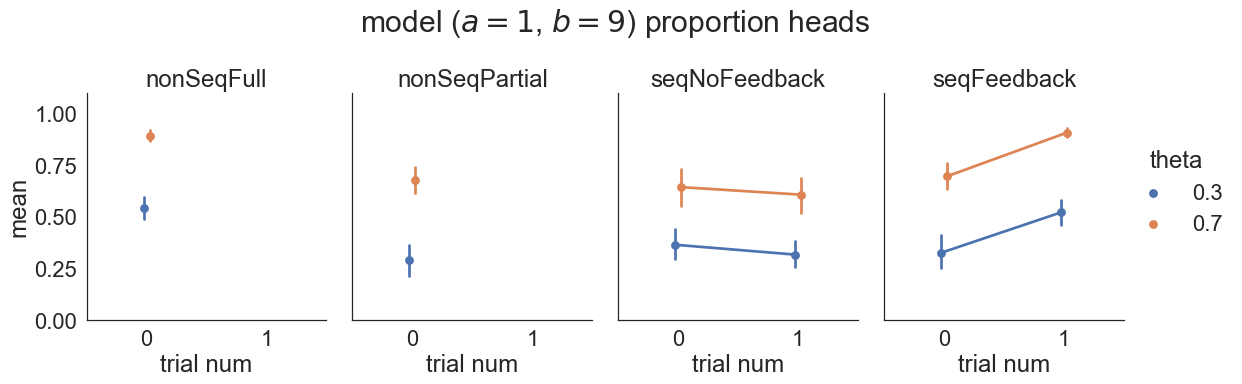

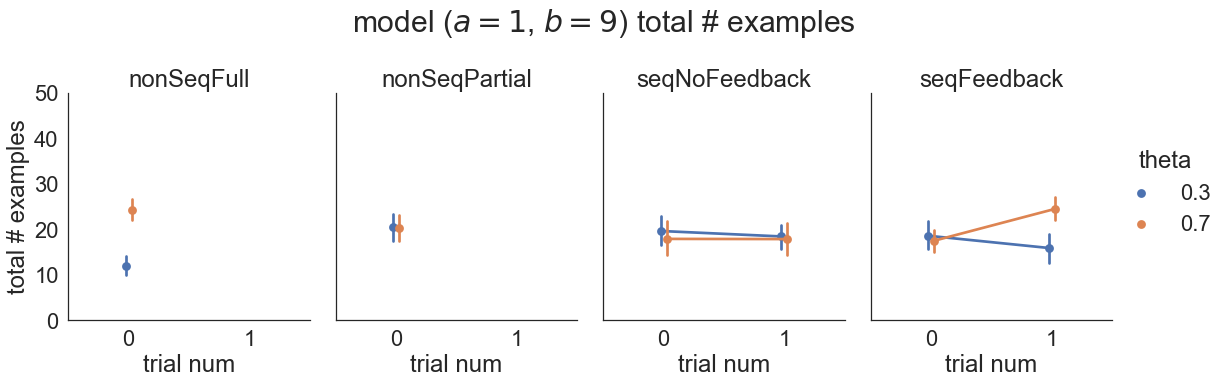

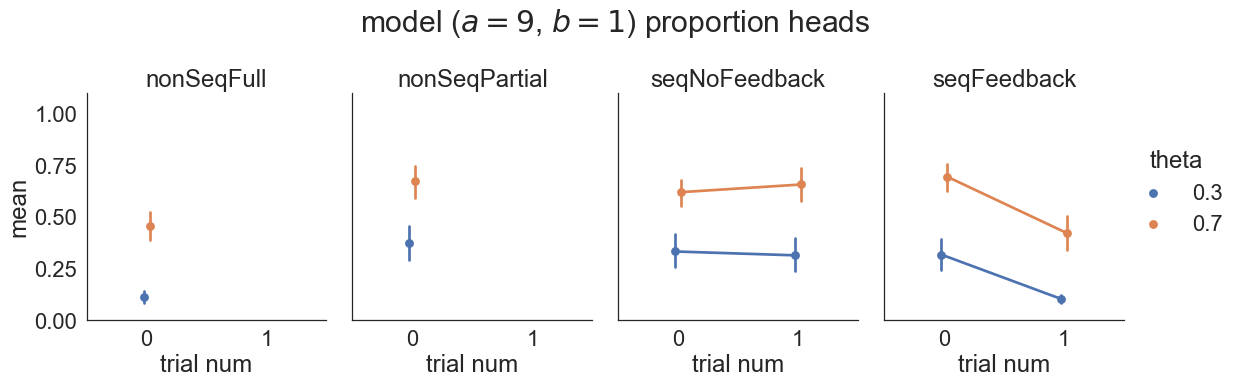

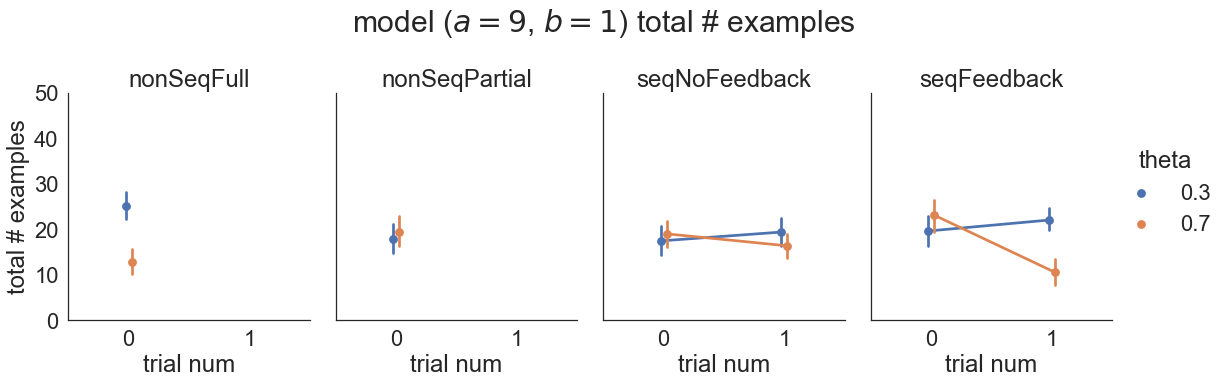

In [33]:
class_hypers = {
    'A': "($a=1$, $b=9$)",
    'B': "($a=9$, $b=1$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle("model " + hypers + " proportion heads", y=1.1, size=30)
     )

    # plt.savefig(f"./output/pilot3_{class_id}_means_model.png", dpi=300, bbox_inches='tight')


    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 50))
     .set_titles("{col_name}")
     .figure.suptitle("model " + hypers + " total # examples", y=1.1, size=30)
     )

    # plt.savefig(f"./output/pilot3_{class_id}_total_ex_model.png", dpi=300, bbox_inches='tight')


Look at the actual points

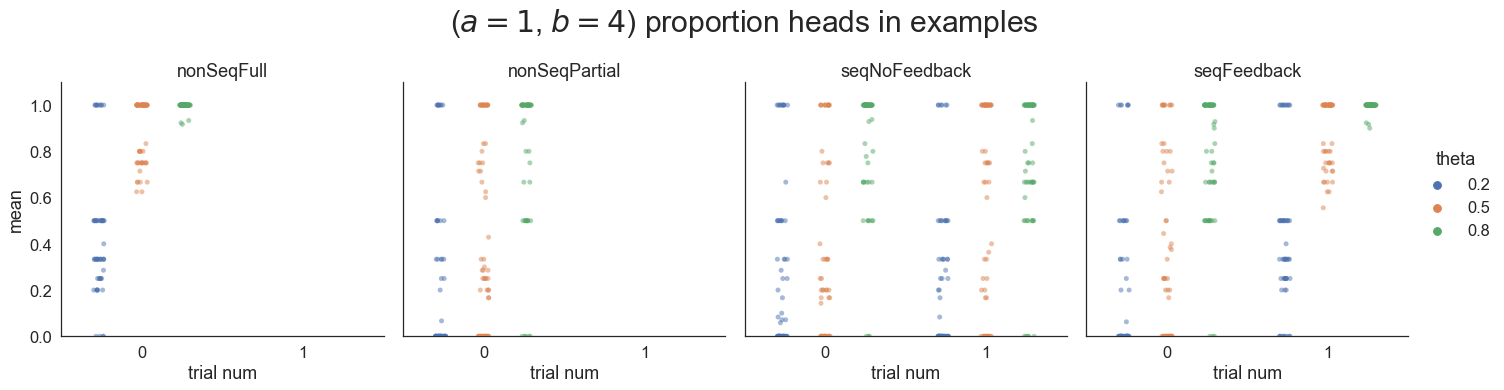

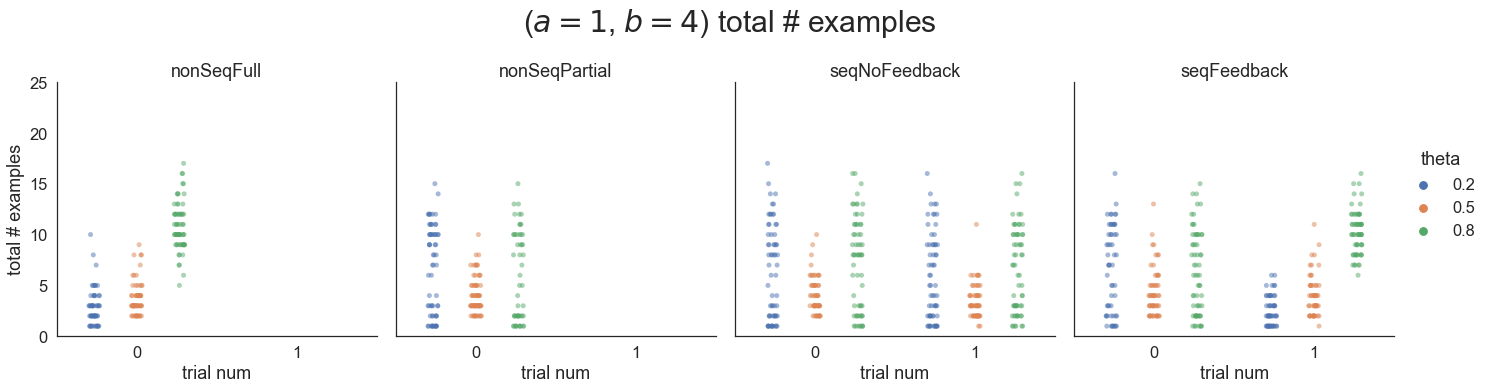

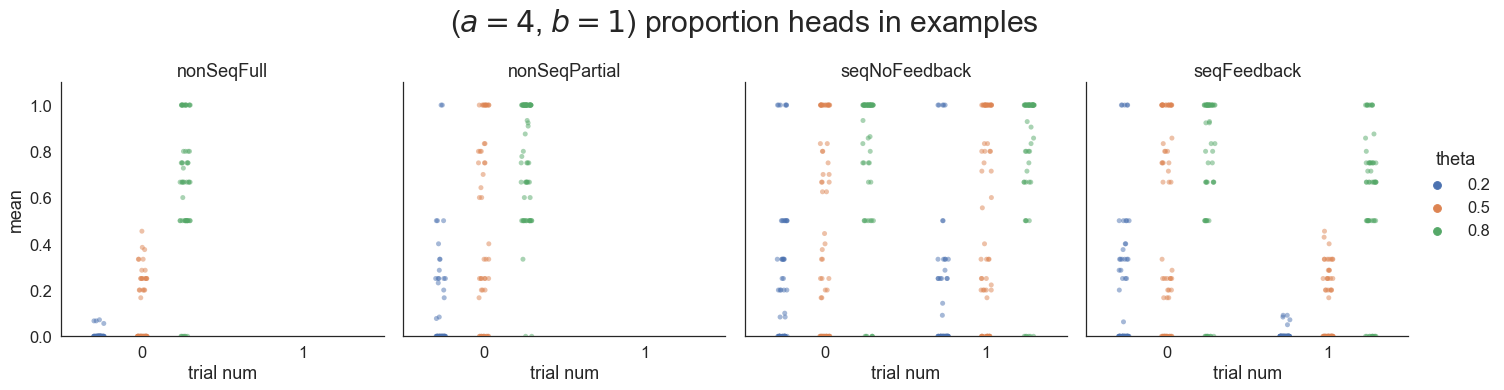

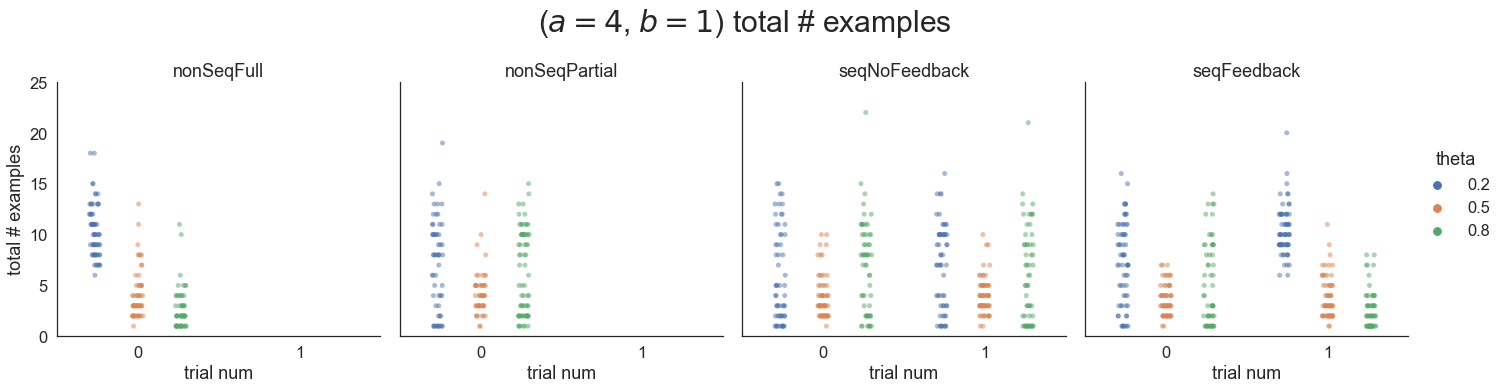

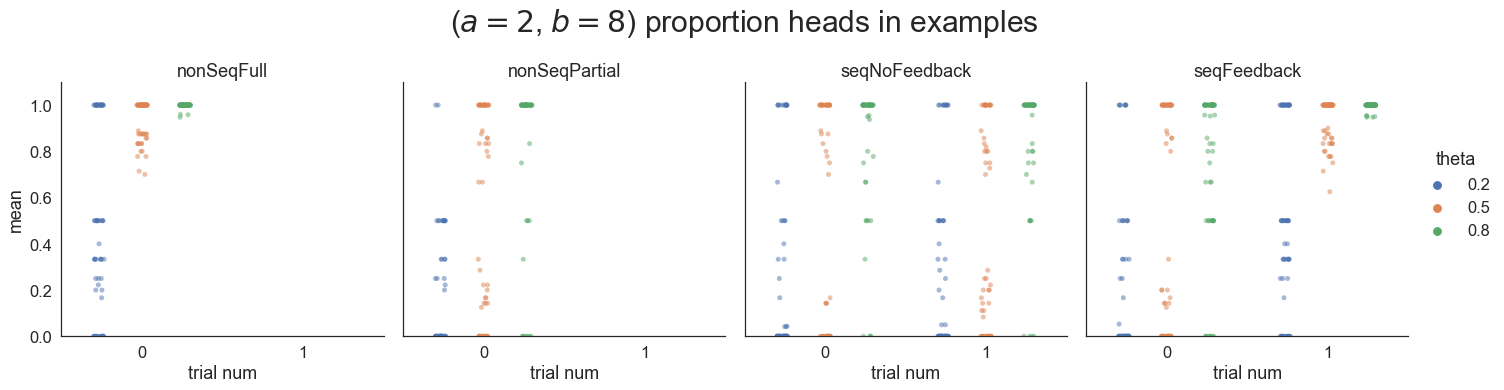

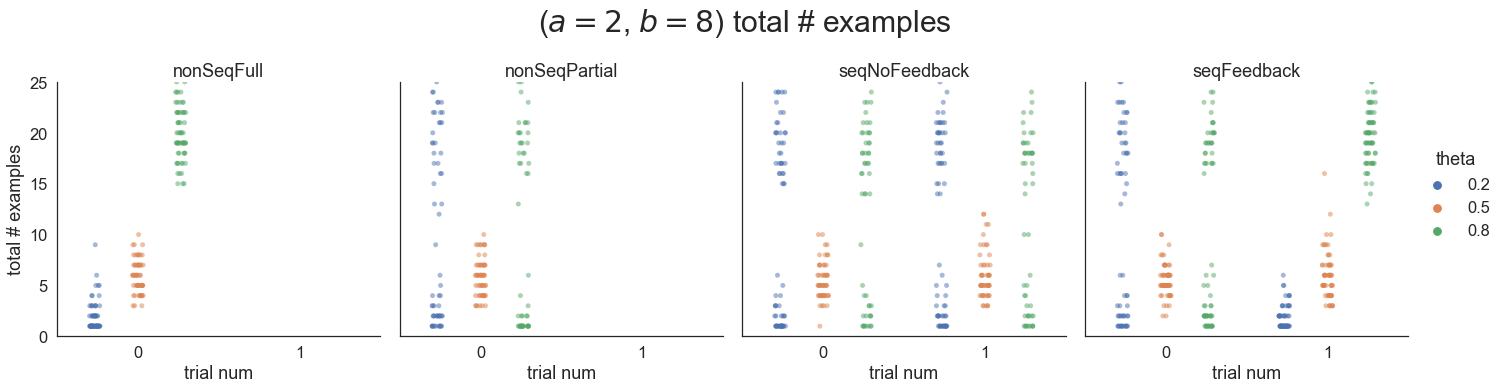

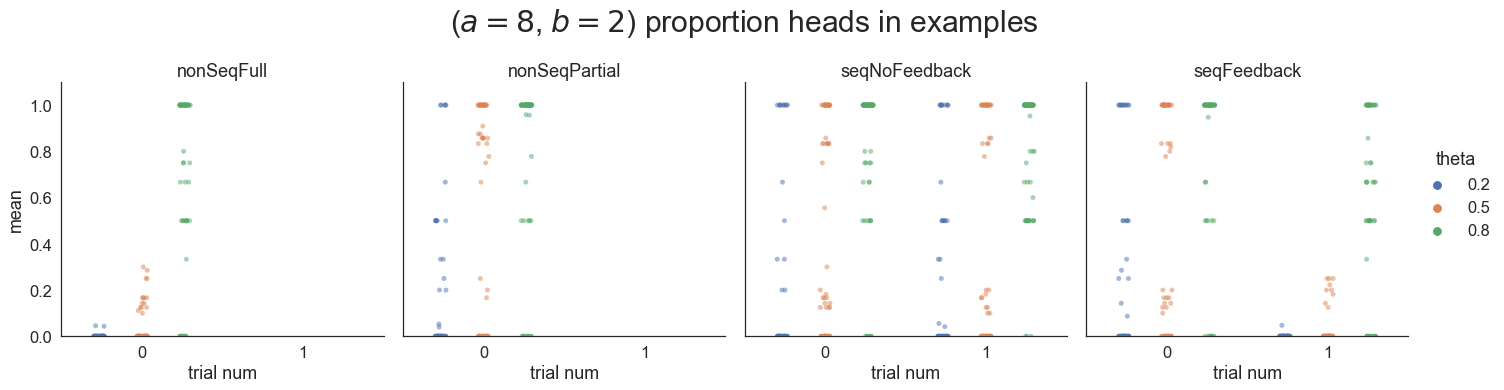

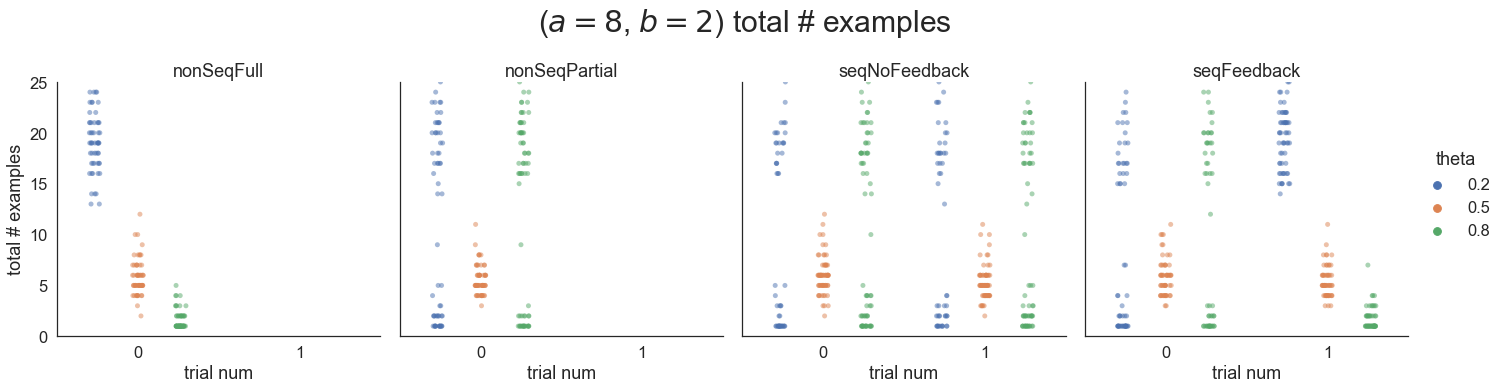

In [4]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )


What happens if we get rid of the cost? 

In [18]:
data_folder = "../model/experiment/output"
df = pd.read_csv(os.path.join(data_folder, 'pilot_3_point_alpha8_cost0_120.csv'))
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
# df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df

,alpha,costWeight,block_type,trial_num,true_theta,student_class,heads,tails,total_ex,mean,student_experience,theta
0,8,0,nonSeqFull,0,0.2,B,2,27,29,0.068966,less,0.2
1,8,0,nonSeqFull,0,0.2,D,0,28,28,0.000000,more,0.2
2,8,0,nonSeqFull,0,0.5,A,14,10,24,0.583333,less,0.5
3,8,0,nonSeqFull,0,0.5,C,17,10,27,0.629630,more,0.5
4,8,0,nonSeqFull,0,0.8,A,15,1,16,0.937500,less,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,8,0,seqFeedback,1,0.5,C,16,11,27,0.592593,more,0.5
4316,8,0,seqFeedback,0,0.8,A,19,5,24,0.791667,less,0.8
4317,8,0,seqFeedback,1,0.8,A,20,2,22,0.909091,less,0.8
4318,8,0,seqFeedback,0,0.8,D,24,0,24,1.000000,more,0.8


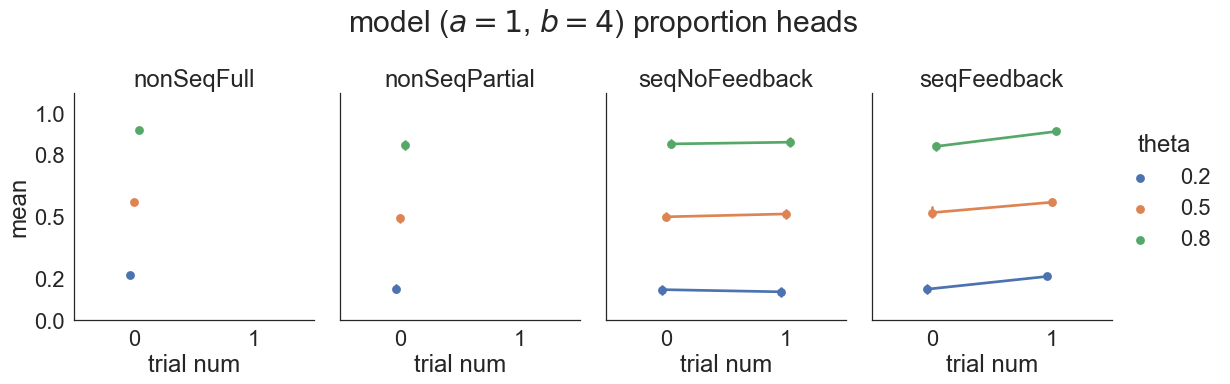

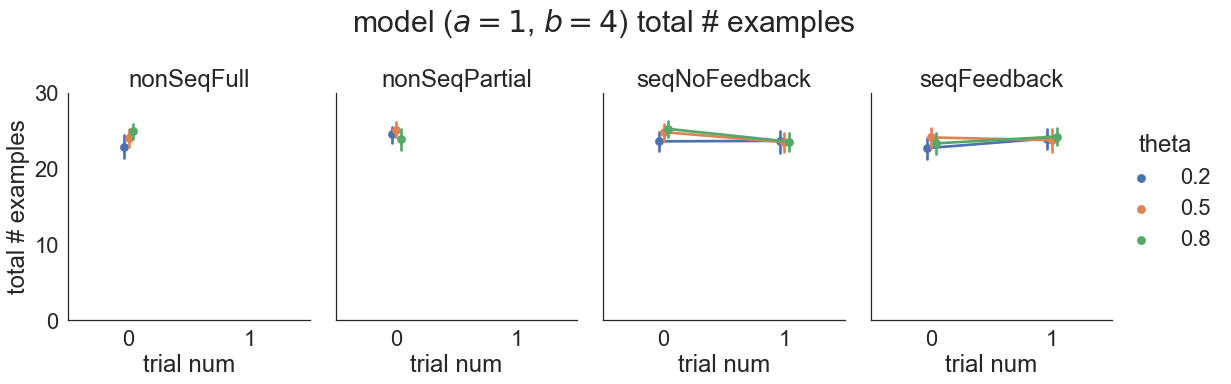

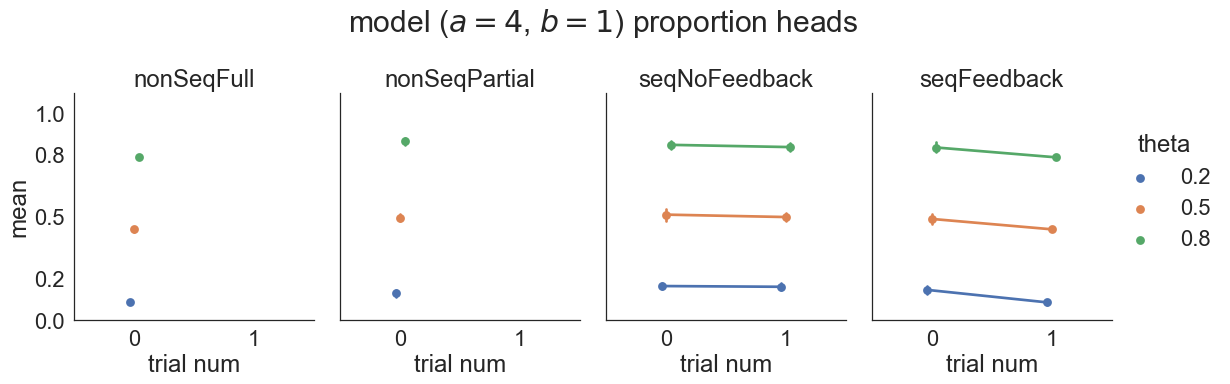

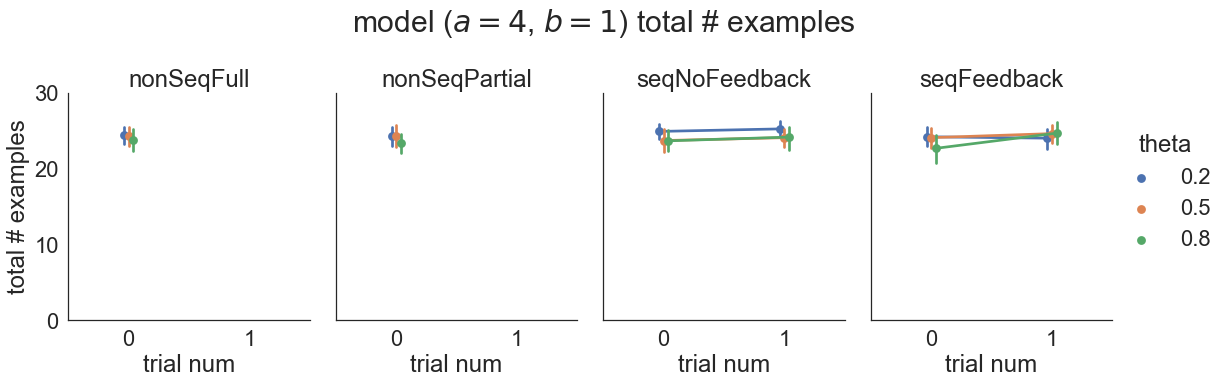

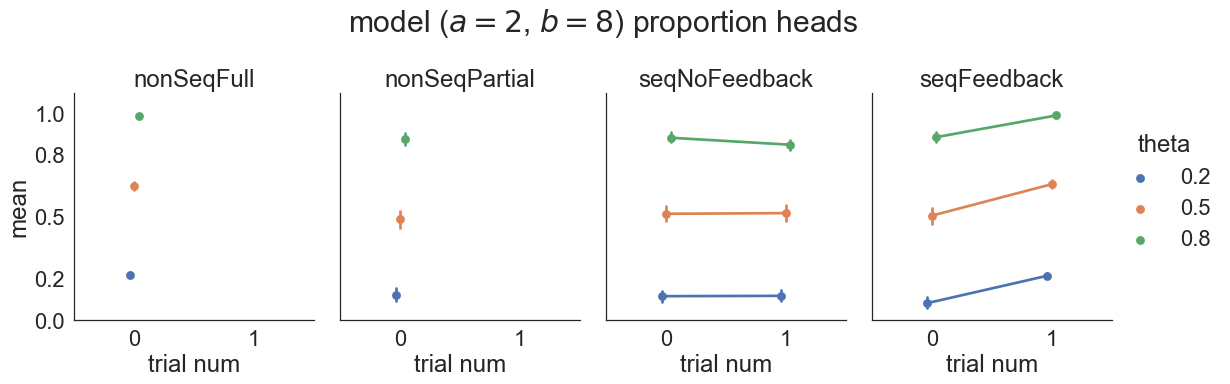

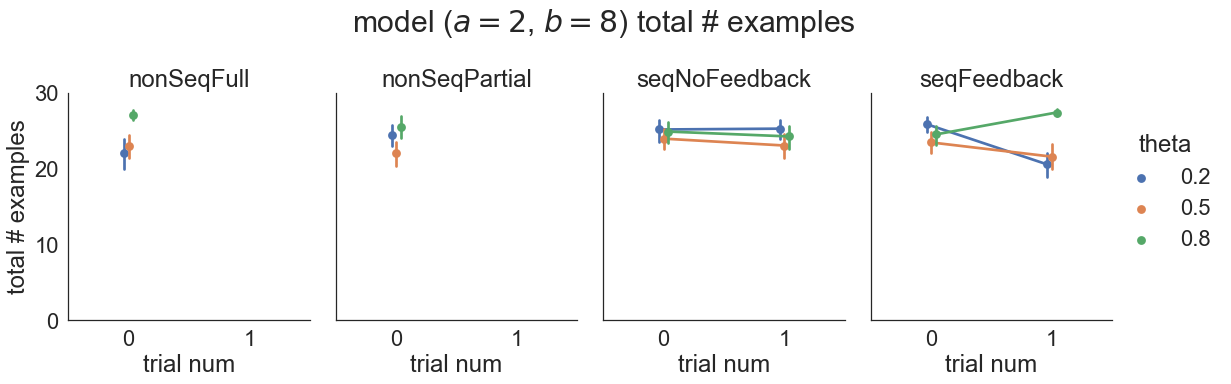

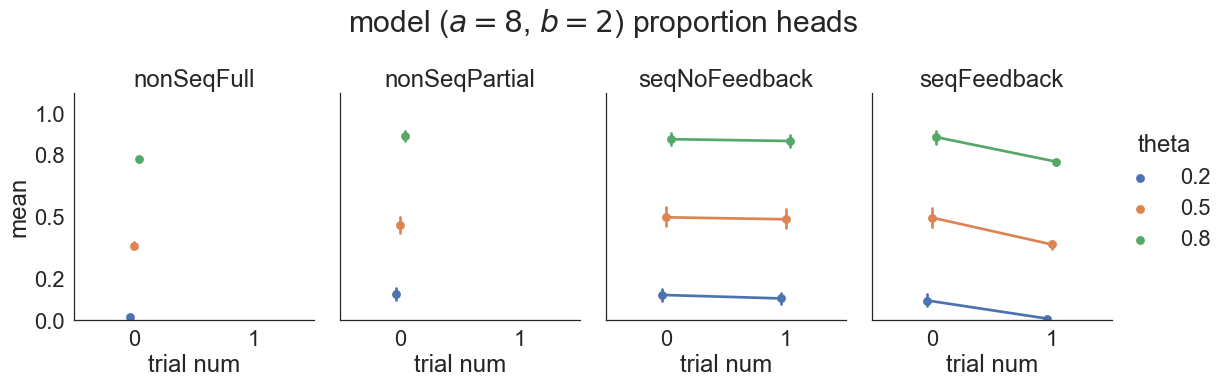

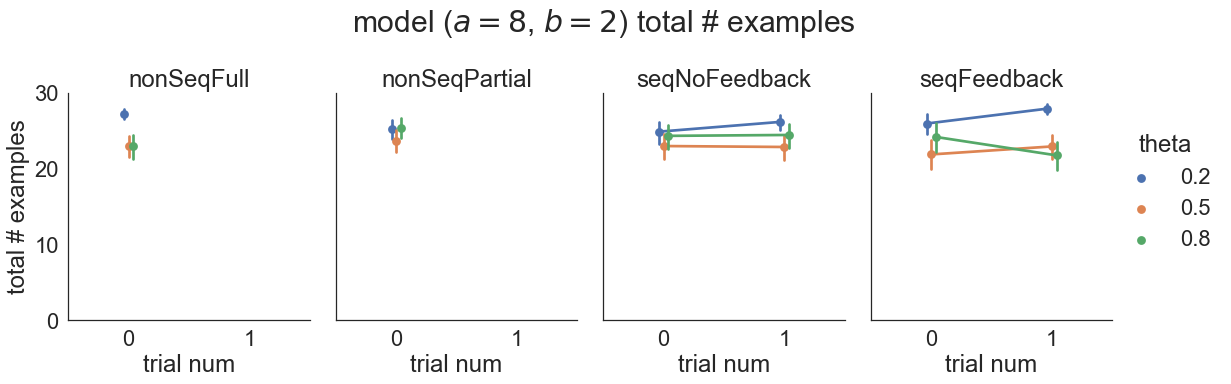

In [19]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1), yticks=[0, 0.2, 0.5, 0.8, 1])
     .figure.suptitle("model " + hypers + " proportion heads", y=1.1, size=30)
     )

    # plt.savefig(f"./output/pilot3_{class_id}_means_model.png", dpi=300, bbox_inches='tight')


    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 30))
     .set_titles("{col_name}")
     .figure.suptitle("model " + hypers + " total # examples", y=1.1, size=30)
     )

    # plt.savefig(f"./output/pilot3_{class_id}_total_ex_model.png", dpi=300, bbox_inches='tight')
